  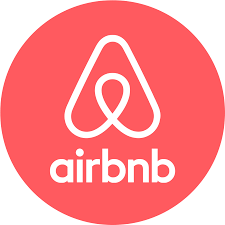                                                             
  #                          Python Exploratory Data Analysis (EDA) on NYC Airbnb

## Problem Statement

**Airbnb** is an online marketplace that connects people who want to rent out their homes with people looking for accommodations in that locale. NYC is the most populous city in the United States, and one of the most popular tourism and business places globally.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Nowadays, Airbnb became one of a kind service that is used by the whole world. Data analysts become a crucial factor for the company that provided millions of listings through Airbnb. These listings generate a lot of data that can be analyzed and used for security, business decisions, understanding of customers’ and providers’ behavior on the platform, implementing innovative additional services, guiding marketing initiatives, and much more.

#### Daatset Descriptions

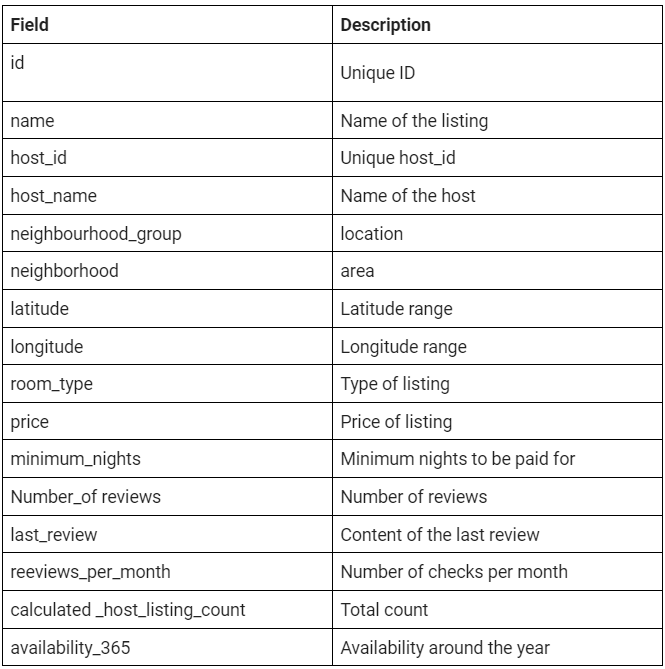

## Initial Analysis

In [1]:
#importing  required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the csv into df
df=pd.read_csv(r'C:\Users\varun\Downloads\Airbnb_data.csv')

In [4]:
# for faster processing
airbnb_df=df.copy()

In [10]:
#shape of the df
airbnb_df.shape

(48858, 16)

In [11]:
# Removing Duplicates
airbnb_df.drop_duplicates(inplace=True)

In [5]:
#initial datatype and null check
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
airbnb_df.isna().sum()  # all the null values in the dataframe

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# removing the nulls in name adn host_name since it doesn't have any significance
airbnb_df.dropna(subset={'host_name','name'},inplace=True)

In [13]:
#last review has no importnace we impute the reviews_per_month with its mean()
airbnb_df.reviews_per_month.fillna(airbnb_df.reviews_per_month.mean(),inplace=True)

In [56]:
# host_id change datatype into object(str)
airbnb_df['Host_id_name']=airbnb_df.host_name+'-'+airbnb_df.host_id.astype('str')  

In [55]:
airbnb_df.last_review=pd.to_datetime(airbnb_df.last_review) # to date time

In [18]:
airbnb_df.last_review.min(),airbnb_df.last_review.max() # finding minimum and max

(Timestamp('2011-03-28 00:00:00'), Timestamp('2019-07-08 00:00:00'))

The dataset timestamp is from **28 th  March 2011** to **8th  July 2019**

In [23]:
# Fid the year of last review
airbnb_df['year']=airbnb_df.last_review.dt.year

In [24]:
# final final
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [123]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.373229,7.148369,112.801425,2018.288323
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.497816,32.964600,131.610962,1.180598
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,2011.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000,2018.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000,2019.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000


In [22]:
# No of unused host_id or name 
airbnb_df[airbnb_df['last_review'].isnull()]['id'].nunique()*100/airbnb_df.id.nunique()

20.54320684432437

**20.54%** of the total entries doesn't have any review assuming that has been used

## Unit Analysis

### Neighbour Hood Distribution


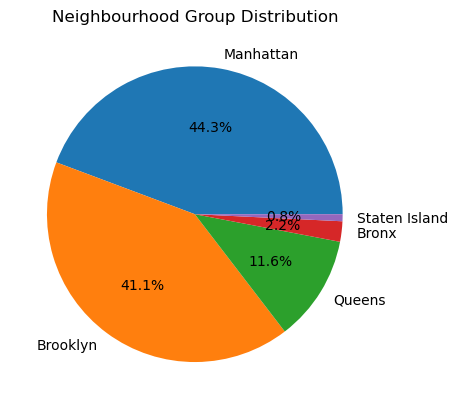

In [25]:
#Creating a pie chart to check Neighbour distribution

counts = airbnb_df['neighbourhood_group'].value_counts()  # Get value counts

# Separate counts and labels into NumPy arrays for pie chart
pie_data = np.array(counts.values.tolist())  # List of counts
pie_labels = np.array(counts.index.tolist())  # List of labels (neighborhood groups)

# Create the pie chart
plt.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")  # Add per-slice percentages
plt.title("Neighbourhood Group Distribution")
plt.show()

**Manhattan** is the most preferred neighbourhood group with  **44%** of the total entries.**Staten** Island has the least with **0.8%** of the total


###  Distribution of Airbnb Room Types

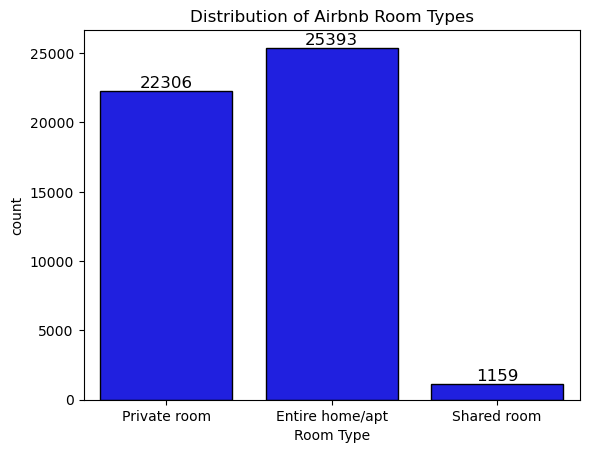

In [29]:
ax=sns.countplot(data=airbnb_df,x='room_type',color="blue",edgecolor='Black')
container = ax.containers[0]
counts = container.datavalues

# Add bar labels using a loop and formatting (optional)
for i, count in enumerate(counts):
    ax.text(i, count + 0.1, f"{count:.0f}", ha='center', va='bottom', fontsize=12)
plt.xlabel('Room Type')
plt.title('Distribution of Airbnb Room Types')
plt.show()


Most preferred room type is **Entire room or Apartment**


### Distribution of  Neighbourhood  based on Room Type

In [33]:
room_type=airbnb_df.room_type.value_counts().index.tolist()

In [34]:
room_type

['Entire home/apt', 'Private room', 'Shared room']

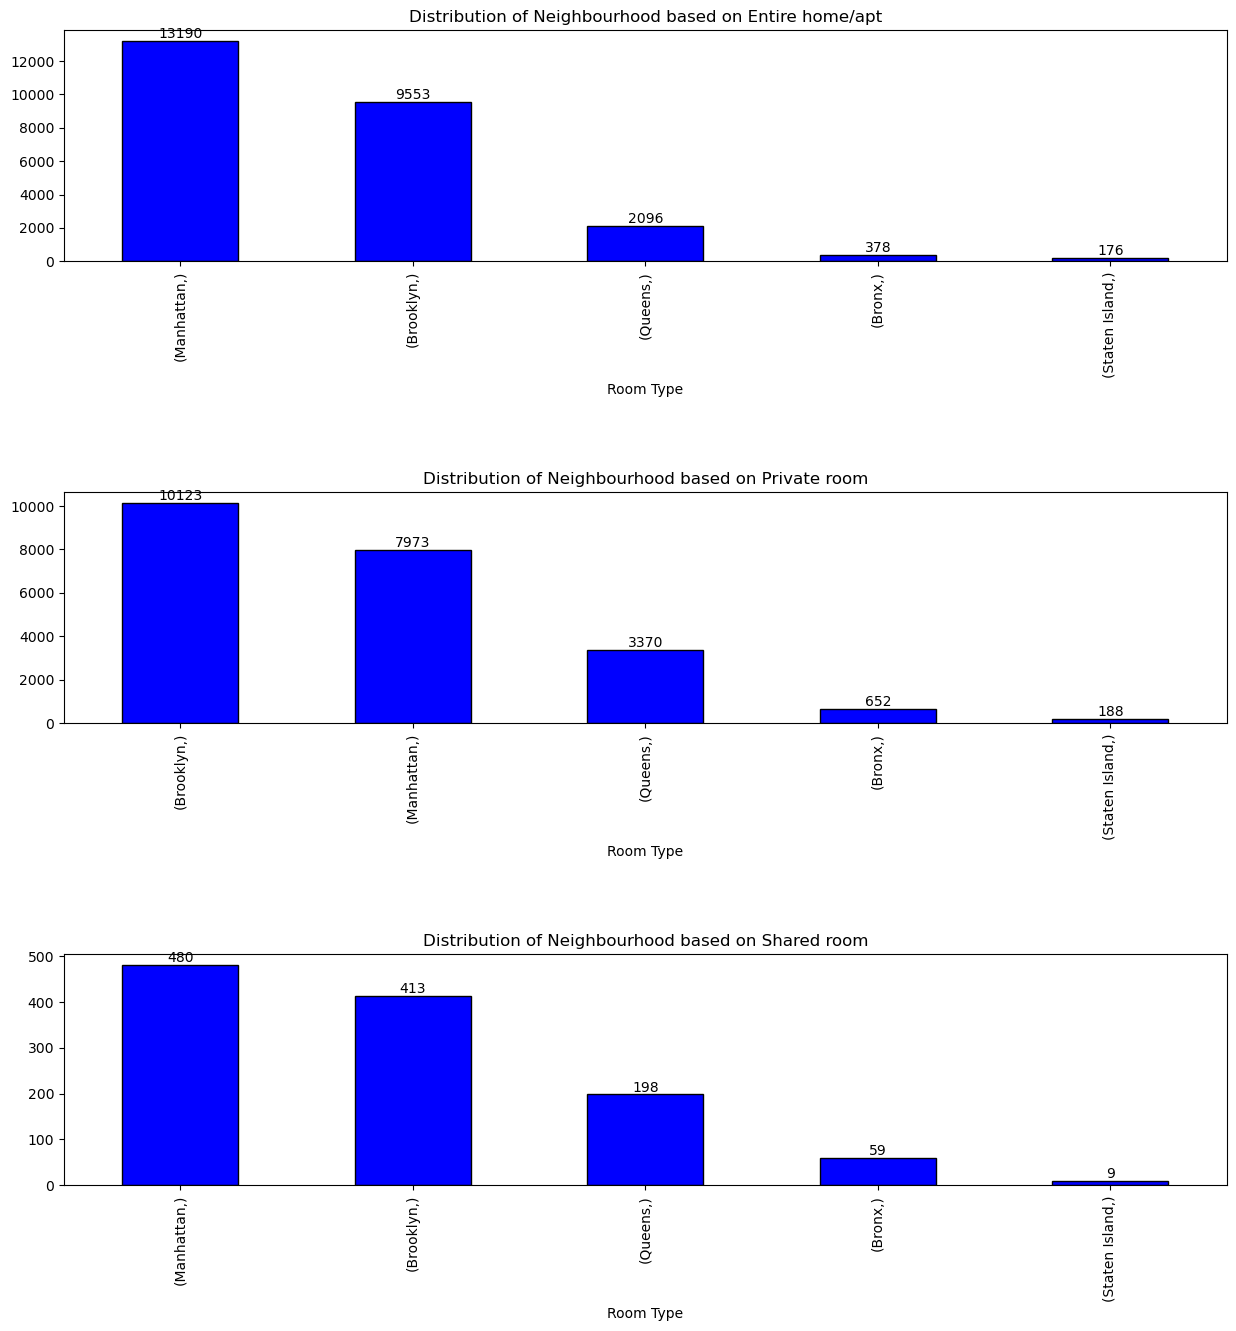

In [138]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=1)

for i,j in enumerate(room_type):
    plt.subplot(3,1,i+1)
    ax=airbnb_df[airbnb_df['room_type']==j][['neighbourhood_group']].value_counts().plot(kind='bar',color='blue',edgecolor='black')
    plt.xlabel('Room Type')
    plt.title(f'Distribution of Neighbourhood based on {j}')
    bar_containers = ax.containers

    # Iterate through bar containers and add labels
    for container in bar_containers:
        ax.bar_label(container)
    
plt.show()
    

For the **Private Rooms** **Brookyln** is the most preferred neighbourhood.

For others **Manhattan** is the most preferred neighbourhood

### Top 20 host

In [65]:
def most_host(data,value):
    sorted_index = data.index.to_numpy()  # Assuming index is for categories
    sorted_values = data.values

# Create the horizontal bar chart with sorted data
    plt.bar(sorted_index, sorted_values,color='blue',edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Total')
    plt.title('Horizontal Bar Chart (Descending Order)')
    plt.xticks(rotation=90)
    plt.xlabel('HostName')
    plt.ylabel('Total Entries')
    if value=='Unused':
        plt.title('Top 20 Host that have unused Apartments')
    else:
        plt.title('Top 20 Host') 
    

    plt.show()

In [66]:
new_data=airbnb_df.Host_id_name.value_counts()[:20]  

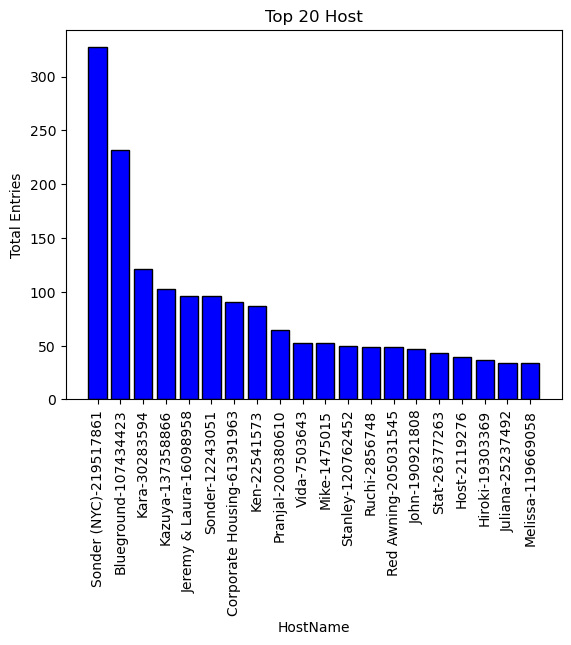

In [67]:
most_host(new_data,'total')   # top 20 host

**Sonder(NYC)** is the most prederred host

## Revenue Analysis

### Average Price over Room Type

In [73]:
average_price=airbnb_df['price'].mean()
average_price.round(2)

152.74

In [108]:
def avg_price(airbnb_df,col,n=5):
    # average price 
    average_price=airbnb_df['price'].mean()
    
    ax=airbnb_df.groupby(col)['price'].mean().sort_values(ascending=False).head(n).plot(kind='bar',edgecolor='black')
    container = ax.containers[0]
    counts = container.datavalues
    # if  the avg is less than total avg  then gray else blue
    colors = ['blue' if count > average_price else 'green' for count in counts] 
    for bar, color in zip(container, colors):
        bar.set_facecolor(color)
    for i, count in enumerate(counts):
        ax.text(i, count + 0.1, f"{count:.0f}", ha='center', va='bottom', fontsize=12)
    plt.axhline(y=average_price, color='red', linestyle='dashed')  # horizontal line

    plt.xlabel(col)
    plt.ylabel('Avergae Price')
    plt.title(f'Averge Price across each {col}')
   
    plt.show()

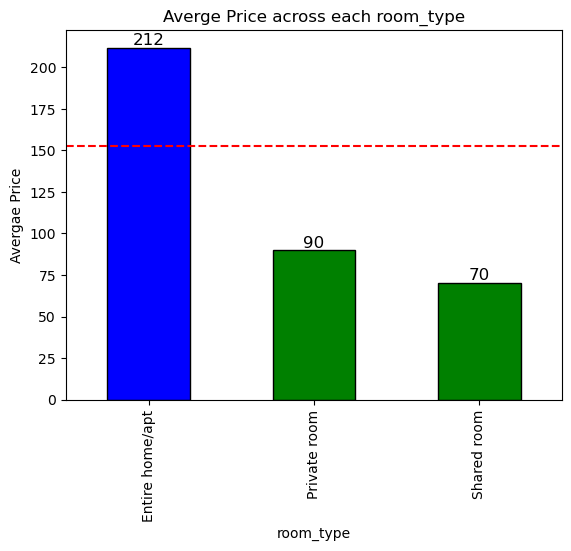

In [109]:
avg_price(airbnb_df,'room_type')

 **Entire home/apt**  is the only romm_type that has **average price higher than total average** **(212>152.74)**.
 
 **Shared Room** is **cheapest**

### Average Price over Neighbourhood Group

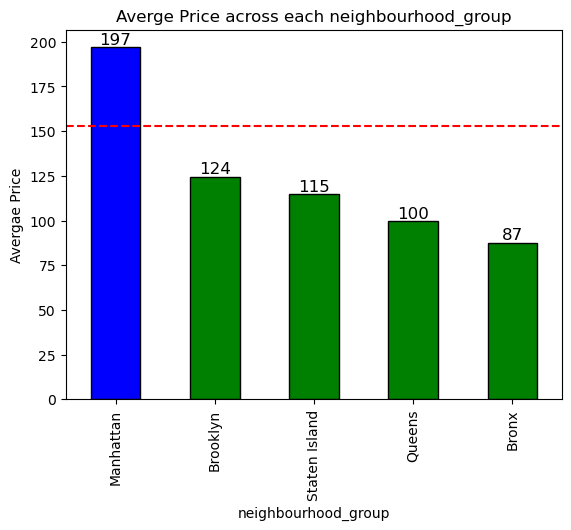

In [112]:
avg_price(airbnb_df,'neighbourhood_group')

Apartment from **Manhattan** none of the neighbourhood hood has **higher average** than total average.

**Bronx** is the cheapest place

## Review Analysis

In [113]:
average_review=airbnb_df['number_of_reviews'].mean()

In [116]:
def avg_review(airbnb_df,col,average_review,n=5):
    
    
    ax=airbnb_df.groupby(col)['number_of_reviews'].mean().sort_values(ascending=False).head(n).plot(kind='bar',edgecolor='black')
    container = ax.containers[0]
    counts = container.datavalues
    colors = ['blue' if count > average_review else 'green' for count in counts]
    for bar, color in zip(container, colors):
        bar.set_facecolor(color)
    for i, count in enumerate(counts):
        ax.text(i, count + 0.1, f"{count:.0f}", ha='center', va='bottom', fontsize=12)
    plt.axhline(y=average_review, color='red', linestyle='dashed')

    plt.xlabel(col)
    plt.ylabel('Average number of Reviews')
    plt.title(f'Average Review across each {col}')
   
    plt.show()

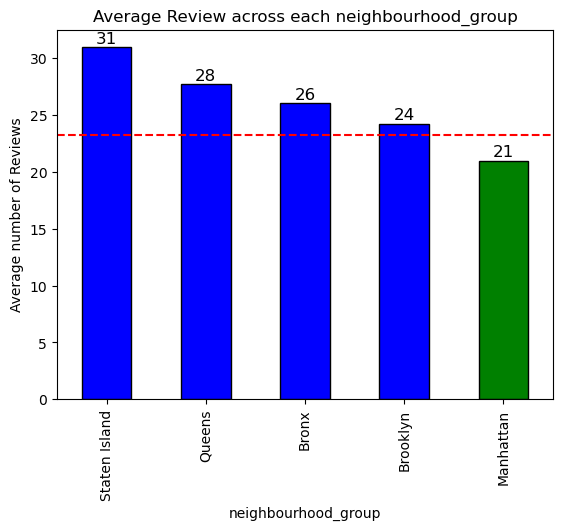

In [117]:
avg_review(airbnb_df,'neighbourhood_group',average_review)

In [ ]:
avg_review(airbnb_df,'neighbourhood_group',average_review)

Averge no of review  is lesser than the total average only for **Manhattan**.

Highest is for **Staten Island**

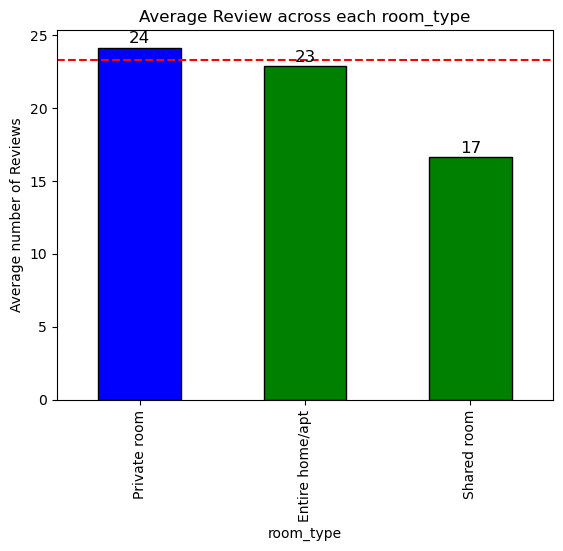

In [118]:
avg_review(airbnb_df,'room_type',average_review)

Average no of reviews  for **Private room**  is **higher than average  number of reviews**. 

**Shared room** has the **least average**.

## Total Review based on Neighbourhood Group

Text(0.5, 1.0, 'Total Review based on Neighbourhood Group')

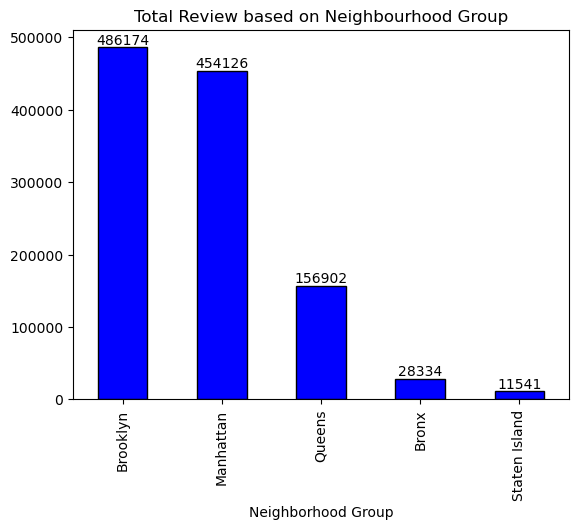

In [145]:
ax=airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).head(5).plot(kind='bar',color='blue',edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Neighborhood Group')
plt.title('Total Review based on Neighbourhood Group')

## Further Analysis

### Average Host Listing over Neighbourhood

In [119]:
average_host_listing=airbnb_df['calculated_host_listings_count'].mean()

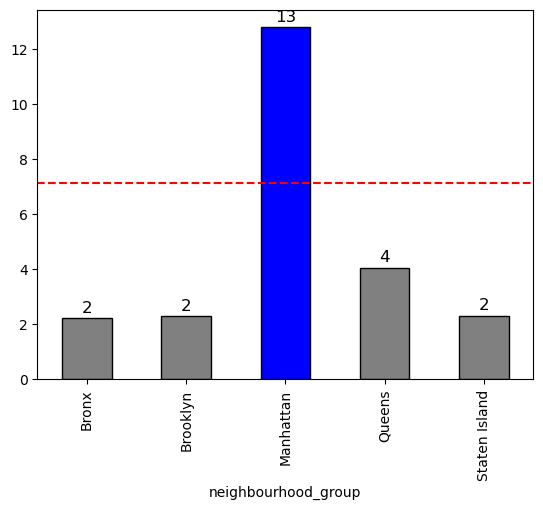

In [121]:

ax=airbnb_df.groupby('neighbourhood_group')['calculated_host_listings_count'].mean().plot(kind='bar',color='blue',edgecolor='black')
container = ax.containers[0]
counts = container.datavalues
    # if  the avg is less than total avg  then gray else blue
colors = ['blue' if count > average_host_listing else 'grey' for count in counts] 
for bar, color in zip(container, colors):
    bar.set_facecolor(color)
for i, count in enumerate(counts):
    ax.text(i, count + 0.1, f"{count:.0f}", ha='center', va='bottom', fontsize=12)
plt.axhline(y=average_host_listing, color='red', linestyle='dashed')  # horizontal line


Average listing is higher for Manhattan

### Top 5  Host with Highest Listing

Text(0.5, 1.0, 'Top 5  Host with Highest Listing')

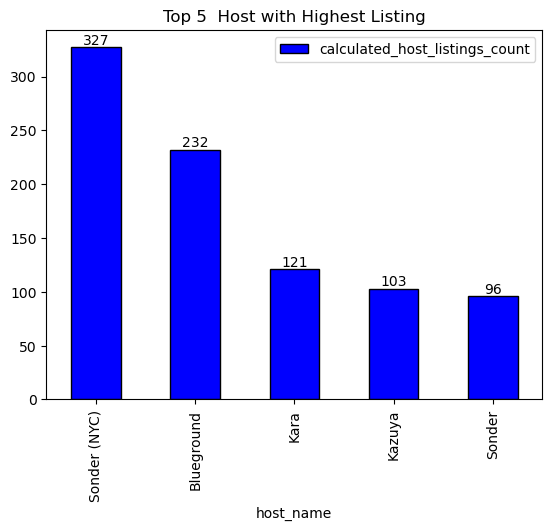

In [135]:
ax=airbnb_df[['host_name','calculated_host_listings_count']].sort_values('calculated_host_listings_count',ascending=False).drop_duplicates().head(5).plot(kind='bar',x='host_name',color='blue',edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('host_name')
plt.title('Top 5  Host with Highest Listing')

### Average Availability based on Neighbourhood Group

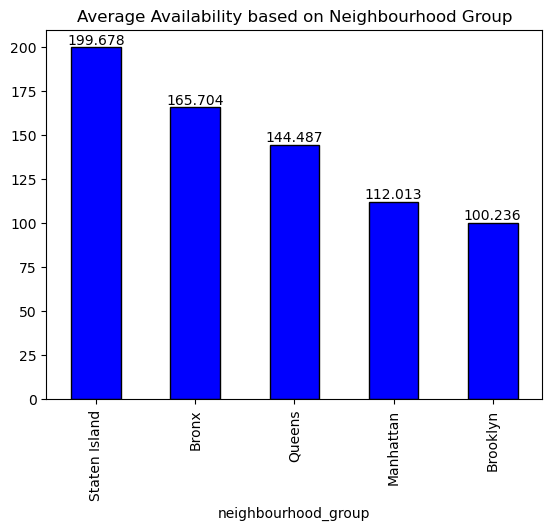

In [146]:
ax=airbnb_df.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False).plot(kind='bar',color='blue',edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('neighbourhood_group')
plt.title('Average Availability based on Neighbourhood Group')
plt.show()

**Average availability** is **very less** in **Brookyln** which can mean that comparing these neighbouring hotels in Brookyln are filled faster.

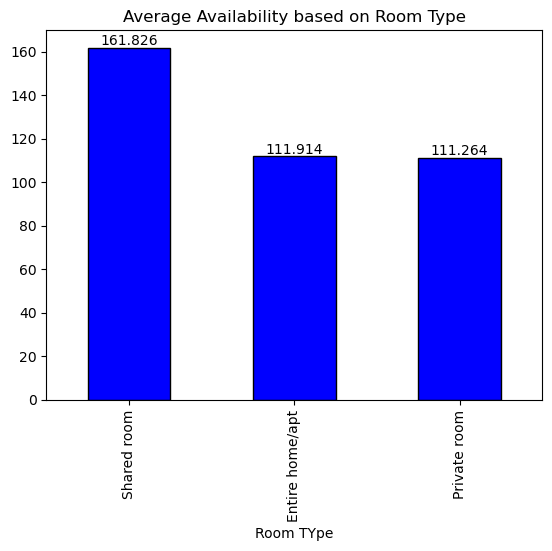

In [148]:
ax=airbnb_df.groupby('room_type')['availability_365'].mean().sort_values(ascending=False).plot(kind='bar',color='blue',edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Room TYpe')
plt.title('Average Availability based on Room Type')
plt.show()

**Shared Room** has higher average  availability  despite being least preferred.

## Insight

- #### Neighbourhood
    - **Manhattan** is the most preferred neighbourhood(**44%** of the total)
    - **Manhattan** has the highest avg price compared to other and **Bronx** has the least
    - **Brokklyn** has the highest number of reviews despite having lesser entries than **Manhattan**
    - **Average  number of reviews**  i s higher on **Staten Islands** and is least for **Manhattan**.
    - **Manhattan** has the highest average host listing(**13**) followed by  **Queens** (**4**) then rest have 2.
    - **Average availability** is **very less** in **Brookyln** which can mean that comparing these neighbouring hotels in Brookyln are filled faster.
- #### Room Type
    - **Entire House/Apartment** is the most preferred room type.
    - Apart from **Private Room** **Manhattan** has the highest number of **shared rooms** and **apartments**.It is higher for **Brooklyn**
    - **Shared Room**  is the cheapest room type and **Entire House/Apartment** is expensive.
    - **Shared Room** has higher average  availability  despite being least preferred.
    - **Shared Room** has  **least average  reviews** and **private room** has  **highest average reviews**.
- #### Host
    - **Sonder (NYC)** is the most preferred host and has **highest average listing**.

## Recommendations

- **Investment Focus:** Given Manhattan's popularity and higher average prices, investors should consider allocating resources towards properties in this neighborhood to maximize returns.

- **Market Analysis:** Despite having fewer entries, Brooklyn stands out for its high number of reviews, indicating strong demand. Investors may want to explore opportunities in Brooklyn, especially considering its relatively lower average listing prices.

- **Demand-Supply Balance:** With lower average availability in Brooklyn, it suggests that properties in this area are in high demand and may get filled quickly. This could present an opportunity for investors to capitalize on the scarcity by offering competitive pricing or enhancing property features to attract tenants.

- **Room Type Strategy:** Entire House/Apartment is the preferred room type, suggesting a preference for privacy among guests. However, considering the higher number of shared rooms in Manhattan and Brooklyn, there might be an opportunity to cater to budget-conscious travelers by offering more shared accommodation options.

- **Pricing Strategy:** Shared rooms are the cheapest option, appealing to budget travelers, while Entire House/Apartment commands a premium. Investors should align their pricing strategy with the preferences of their target market while ensuring competitiveness within the neighborhood.

- **Host Consideration:** Sonder (NYC) emerges as the most preferred host with the highest average listing. Partnering with reputable hosts like Sonder may enhance credibility and attract more guests. Investors should explore collaboration opportunities with such hosts to leverage their brand reputation and customer base.

- **Quality Focus:** Private rooms receive the highest average reviews, indicating a preference for comfort and privacy among guests. Investors should prioritize maintaining high standards of cleanliness, amenities, and customer service to enhance guest satisfaction and drive positive reviews.